In [23]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
cpu_df = pd.read_csv('csv/vnf_cpu_usage.csv')
mem_df = pd.read_csv('csv/vnf_mem_usage.csv')
esk_cpu_df = pd.read_csv('csv/esk_cpu_usage.csv')
esk_mem_df = pd.read_csv('csv/esk_mem_usage.csv')
flu_cpu_df = pd.read_csv('csv/flu_cpu_usage.csv')
flu_mem_df = pd.read_csv('csv/flu_mem_usage.csv')
prom_cpu_df = pd.read_csv('csv/prom_cpu_usage.csv')
prom_mem_df = pd.read_csv('csv/prom_mem_usage.csv')
kube_cpu_df = pd.read_csv('csv/kube_cpu_usage.csv')
kube_mem_df = pd.read_csv('csv/kube_mem_usage.csv')

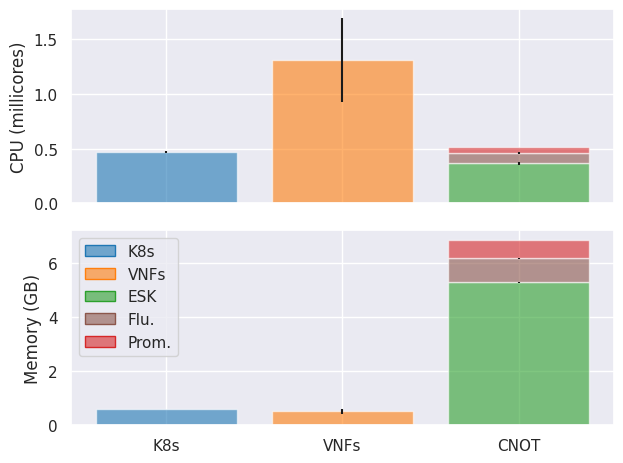

In [24]:
# Calculate mean and standard error for CPU from first CSV
cpu_mean = cpu_df['Total'].mean()
cpu_std_err = cpu_df['Total'].sem()

# Calculate mean and standard error for Memory
mem_mean = mem_df['Total'].mean() / 1e9
mem_std_err = mem_df['Total'].sem() / 1e9

# Calculate mean and standard error for CPU from second CSV
esk_cpu_mean = esk_cpu_df['Total'].mean()
esk_cpu_std_err = esk_cpu_df['Total'].sem()

esk_mem_mean = esk_mem_df['Total'].mean() / 1e9
esk_mem_std_err = esk_mem_df['Total'].sem() / 1e9

flu_cpu_mean = flu_cpu_df['Total'].mean()
flu_cpu_std_err = flu_cpu_df['Total'].sem()

flu_mem_mean = flu_mem_df['Total'].mean() / 1e9
flu_mem_std_err = flu_mem_df['Total'].sem() / 1e9

prom_cpu_mean = prom_cpu_df['Total'].mean()
prom_cpu_std_err = prom_cpu_df['Total'].sem()

prom_mem_mean = prom_mem_df['Total'].mean() / 1e9
prom_mem_std_err = prom_mem_df['Total'].sem() / 1e9

kube_cpu_mean = kube_cpu_df['Total'].mean()
kube_cpu_std_err = kube_cpu_df['Total'].sem()

kube_mem_mean = kube_mem_df['Total'].mean() / 1e9
kube_mem_std_err = kube_mem_df['Total'].sem() / 1e9

# Create subplots
fig, axs = plt.subplots(2, 1, sharex=True)

# Colors list to be used for both CPU and Memory bars
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:brown', 'tab:red']

# Plot CPU usage from various CSVs, with K8s first and CNOT (stacked bar) last
labels = ['K8s', 'VNFs', 'CNOT']
cpu_means = [kube_cpu_mean, cpu_mean]
cpu_std_errs = [kube_cpu_std_err, cpu_std_err]

# Stacked bar values for CPU
stacked_cpu_means = [esk_cpu_mean, prom_cpu_mean, flu_cpu_mean]
stacked_cpu_std_errs = [esk_cpu_std_err, prom_cpu_std_err, flu_cpu_std_err]

# Plotting individual and stacked bars for CPU
for label, mean, std_err, color in zip(labels, cpu_means, cpu_std_errs, colors):
    axs[0].bar(label, mean, yerr=std_err, color=color, alpha=0.6, label=f'Total_CPU ({label})')
    
bottom_cpu = 0
for mean, std_err, color in zip(stacked_cpu_means, stacked_cpu_std_errs, colors[2:]):
    axs[0].bar('CNOT', mean, yerr=std_err, color=color, alpha=0.6, bottom=bottom_cpu)
    bottom_cpu += mean
    
axs[0].set_ylabel('CPU (millicores)')

# Plot Memory usage from various CSVs, with K8s first and CNOT (stacked bar) last
mem_means = [kube_mem_mean, mem_mean]
mem_std_errs = [kube_mem_std_err, mem_std_err]

# Stacked bar values for Memory
stacked_mem_means = [esk_mem_mean, prom_mem_mean, flu_mem_mean]
stacked_mem_std_errs = [esk_mem_std_err, prom_mem_std_err, flu_mem_std_err]

# Plotting individual and stacked bars for Memory
for label, mean, std_err, color in zip(labels, mem_means, mem_std_errs, colors):
    axs[1].bar(label, mean, yerr=std_err, color=color, alpha=0.6, label=f'Total_Mem ({label})')

bottom_mem = 0
for mean, std_err, color in zip(stacked_mem_means, stacked_mem_std_errs, colors[2:]):
    axs[1].bar('CNOT', mean, yerr=std_err, color=color, alpha=0.6, bottom=bottom_mem)
    bottom_mem += mean

axs[1].set_ylabel('Memory (GB)')
from matplotlib.patches import Patch

# Define custom handles for the legend using the updated colors
handles = [
    Patch(color='tab:blue', label='K8s'),
    Patch(color='tab:orange', label='VNFs'),
    Patch(color='tab:green', label='ESK'),
    Patch(color='tab:brown', label='Flu.'),
    Patch(color='tab:red', label='Prom.')
]

# Adding the legend to the second subplot and adjusting its transparency
legend = axs[1].legend(handles=handles, loc='upper left')
for patch in legend.get_patches():
    patch.set_facecolor((patch.get_facecolor()[0], patch.get_facecolor()[1], patch.get_facecolor()[2], 0.6))

fig.tight_layout()

# Show the plots

plt.savefig('out/resources_usage.pdf', dpi=300, bbox_inches='tight')
plt.savefig('out/resources_usage.png', dpi=300, bbox_inches='tight')
plt.show()
